In [54]:
import numpy as np
import pandas as pd
import os
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import models, transforms
from collections import OrderedDict
from tqdm import tqdm
import pprint
import cv2
import random
import torch
import sys
%matplotlib inline
sys.path.append("..")

In [12]:
use_cuda = torch.cuda.is_available()

In [46]:
from model.resnet_FT import ResNetGAPFeatures as Net
from utils.data import read_data, create_dataloader, AestheticsDataset

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Create dataset

In [5]:
train = read_data("../data/train.csv", "../images")
val = read_data("../data/val.csv", "../images")
test = read_data("../data/test.csv", "../images", is_test = True)

In [7]:
train_loader = create_dataloader(train, batch_size=1)
val_loader = create_dataloader(val, batch_size=1, is_train=False)
test_loader = create_dataloader(test, batch_size=1, is_train=False)

## Create Model

In [38]:
save_path = "../checkpoint/001" 
checkpoint = "epoch_7.loss_0.3689495857215759.pth"
resnet = models.resnet50(pretrained=True)
net = Net(resnet, n_features=12)
if use_cuda:
    resnet = resnet.cuda()
    net = net.cuda()
    net.load_state_dict(torch.load(f"{save_path}/{checkpoint}"))
else:
    net.load_state_dict(torch.load(f"{save_path}/{checkpoint}", map_location=lambda storage, loc: storage))

## Result 

In [16]:
train_results = pd.read_csv(f"{save_path}/train_results.csv").drop(["Unnamed: 0"], 1)
val_results = pd.read_csv(f"{save_path}/val_results.csv").drop(["Unnamed: 0"], 1)
train_corr_results = pd.read_csv(f"{save_path}/train_corr_results.csv").drop(["Unnamed: 0"], 1)
val_corr_results = pd.read_csv(f"{save_path}/val_corr_results.csv").drop(["Unnamed: 0"], 1)

In [17]:
train_results.groupby("epoch").mean()

,BalancingElements,ColorHarmony,Content,DoF,Light,MotionBlur,Object,Repetition,RuleOfThirds,Symmetry,VividColor,score,total_loss
epoch,,,,,,,,,,,,,
0,0.022364,0.040259,0.115086,0.034403,0.059256,0.0,0.101133,0.0,0.028052,0.0,0.059686,0.030861,0.491100
1,0.020905,0.034890,0.102037,0.028386,0.053957,0.0,0.085910,0.0,0.026555,0.0,0.047443,0.026155,0.426238
2,0.020522,0.033836,0.095646,0.026924,0.051087,0.0,0.080492,0.0,0.026010,0.0,0.043721,0.023982,0.402219
3,0.020387,0.033059,0.092731,0.026074,0.049157,0.0,0.077935,0.0,0.025664,0.0,0.042023,0.022686,0.389716
4,0.019910,0.032264,0.088370,0.025192,0.047445,0.0,0.075204,0.0,0.025341,0.0,0.040077,0.021593,0.375395
5,0.019827,0.031922,0.086758,0.024576,0.046400,0.0,0.073122,0.0,0.025283,0.0,0.040116,0.020806,0.368811
6,0.019607,0.031250,0.084101,0.024176,0.045609,0.0,0.072901,0.0,0.025017,0.0,0.039027,0.020164,0.361852
7,0.019632,0.031339,0.082545,0.023591,0.044851,0.0,0.070840,0.0,0.025018,0.0,0.038575,0.019698,0.356090
8,0.019349,0.030621,0.079949,0.023376,0.044232,0.0,0.069755,0.0,0.024496,0.0,0.038667,0.019218,0.349664


In [18]:
val_results.groupby("epoch").mean()

,BalancingElements,ColorHarmony,Content,DoF,Light,MotionBlur,Object,Repetition,RuleOfThirds,Symmetry,VividColor,score,total_loss
epoch,,,,,,,,,,,,,
0,0.022459,0.034984,0.092988,0.030980,0.058302,0.0,0.080510,0.0,0.026651,0.0,0.039118,0.016734,0.402725
1,0.021912,0.033818,0.095230,0.028576,0.053062,0.0,0.077989,0.0,0.025778,0.0,0.034110,0.016589,0.387064
2,0.021842,0.034092,0.095474,0.027866,0.052035,0.0,0.079348,0.0,0.026276,0.0,0.033144,0.016868,0.386944
3,0.021848,0.033343,0.095480,0.027107,0.053638,0.0,0.077801,0.0,0.026302,0.0,0.032950,0.016924,0.385394
4,0.023075,0.032684,0.094920,0.026704,0.049958,0.0,0.076584,0.0,0.027377,0.0,0.031748,0.016743,0.379791
5,0.021690,0.033289,0.089122,0.026331,0.050801,0.0,0.074525,0.0,0.026895,0.0,0.033151,0.016541,0.372345
6,0.021342,0.033324,0.088770,0.026164,0.050743,0.0,0.074124,0.0,0.026604,0.0,0.031889,0.016344,0.369304
7,0.021822,0.032663,0.090747,0.025886,0.049237,0.0,0.073766,0.0,0.025893,0.0,0.031997,0.016938,0.368950
8,0.021556,0.032599,0.089461,0.025904,0.049929,0.0,0.073777,0.0,0.026190,0.0,0.031666,0.016764,0.367846


In [19]:
train_corr_results.groupby("epoch").mean()

,BalancingElements,ColorHarmony,Content,DoF,Light,MotionBlur,Object,Repetition,RuleOfThirds,Symmetry,VividColor,score
epoch,,,,,,,,,,,,
0,0.111302,0.290626,0.310085,0.290966,0.165840,-0.037940,0.487072,0.039874,0.082426,0.102345,0.379183,0.318823
1,0.215539,0.436138,0.457458,0.487355,0.342476,-0.030478,0.591517,0.010804,0.186800,0.104662,0.584285,0.509148
2,0.241833,0.466195,0.508414,0.519488,0.405410,-0.028717,0.624997,-0.011486,0.219460,0.099163,0.622968,0.565261
3,0.261251,0.483556,0.534008,0.541802,0.439078,-0.021426,0.638565,-0.035082,0.242833,0.095649,0.647998,0.596063
4,0.287777,0.506104,0.556244,0.567593,0.468505,-0.021902,0.654848,-0.064847,0.261784,0.089169,0.661596,0.615636
5,0.291718,0.517650,0.571026,0.571776,0.484229,-0.008374,0.668898,-0.065738,0.274144,0.055308,0.665340,0.639802
6,0.309671,0.526970,0.591485,0.585101,0.506792,-0.011745,0.674806,-0.079224,0.287844,0.059027,0.677644,0.652665
7,0.320948,0.530023,0.597356,0.602103,0.510395,-0.010184,0.680740,-0.052783,0.289665,0.041405,0.686110,0.660634
8,0.330436,0.540604,0.619924,0.591583,0.527123,-0.003911,0.687608,-0.046761,0.313113,0.025522,0.680144,0.674296


In [20]:
val_corr_results.groupby("epoch").mean()

,BalancingElements,ColorHarmony,Content,DoF,Light,MotionBlur,Object,Repetition,RuleOfThirds,Symmetry,VividColor,score
epoch,,,,,,,,,,,,
0,0.119220,0.239760,0.216306,0.425117,0.153653,-0.102298,0.539859,0.055747,0.073268,0.117459,0.579960,0.270380
1,0.144015,0.280134,0.262790,0.474300,0.237879,-0.113633,0.552942,0.064573,0.086266,0.112306,0.630732,0.308701
2,0.161280,0.294335,0.293455,0.499498,0.280306,-0.122365,0.560898,0.049109,0.093230,0.116001,0.642283,0.336267
3,0.161116,0.313515,0.311492,0.507023,0.295015,-0.107904,0.571084,0.052828,0.110901,0.111165,0.641809,0.347664
4,0.176959,0.322744,0.334555,0.516883,0.332953,-0.107329,0.574509,0.049652,0.108834,0.098135,0.653806,0.368110
5,0.167194,0.321308,0.343994,0.529320,0.345540,-0.090586,0.577620,0.063888,0.124708,0.095667,0.650407,0.381184
6,0.181084,0.325925,0.350841,0.533018,0.348659,-0.094205,0.576865,0.061847,0.136653,0.093321,0.656471,0.393415
7,0.175134,0.327185,0.364801,0.530524,0.355756,-0.104309,0.583625,0.025695,0.131714,0.065646,0.651737,0.396782
8,0.181491,0.331798,0.366035,0.535650,0.359669,-0.085796,0.581152,NaN,0.125246,NaN,0.655082,0.402976


## Visualization

In [30]:
attr_keys = ['BalacingElements', 'ColorHarmony', 'Content', 'DoF',
             'Light', 'MotionBlur', 'Object', 'RuleOfThirds', 'VividColor']
non_neg_attr_keys = ['Repetition', 'Symmetry', 'score']
all_keys = attr_keys + non_neg_attr_keys
used_keys = ["ColorHarmony", "Content", "DoF", "Object", "VividColor", "score"]

In [40]:
weights = {k: net.attribute_weights.weight[i, :] for i, k in enumerate(all_keys)} 

In [41]:
def extract_pooled_features(inp, net):
    _ = net(inp)
    pooled_features = [features.feature_maps for features in net.all_features] 
    return pooled_features

In [42]:
def downsample_pooled_features(features):
    dim_reduced_features = []
    for pooled_feature in pooled_features:
        if pooled_feature.size()[-1] == 75:
            dim_reduced_features.append(F.avg_pool2d(pooled_feature, kernel_size=(7, 7)))
        elif pooled_feature.size()[-1] == 38:
            dim_reduced_features.append(F.avg_pool2d(pooled_feature, kernel_size = (4, 4), padding=1))
        elif pooled_feature.size()[-1] == 19:
            dim_reduced_features.append(F.avg_pool2d(pooled_feature, kernel_size = (2, 2), padding=1))
        elif pooled_feature.size()[-1] == 10:
            dim_reduced_features.append(pooled_feature)
    dim_reduced_features = torch.cat(dim_reduced_features, dim=1).squeeze()
    return dim_reduced_features

In [60]:
def scale(image, low=-1, high=1):
    im_max = np.max(image)
    im_min = np.min(image)
    return (high - low) * (image - np.min(image))/(im_max - im_min) + low 

def extract_heatmap(features, weights, w, h):
#     cam = np.ones((10, 10), dtype=np.float32) 
    
#     # Sum up the feature maps 
#     temp = weight.view(-1, 1, 1) * features
#     summed_temp = torch.sum(temp, dim=0).data.cpu().numpy()
#     cam = cam + summed_temp
#     cam = cv2.resize(cam, (w, h))
#     cam = np.maximum(cam, 0)
#     cam = np.uint8(255*(cam/np.max(cam)))
    cam = np.zeros((10, 10), dtype=np.float32) 
    temp = weights.view(-1, 1, 1) * downsampled_pooled_features
    summed_temp = torch.sum(temp, dim=0).data.cpu().numpy()
    cam = cam + summed_temp
    cam = cv2.resize(cam, (w, h))
    cam = scale(cam)
    return cam 

In [61]:
def extract_prediction(inp, net):
    d = dict()
    net.eval()
    output = net(inp)
    for i, key in enumerate(all_keys):
        d[key] = output[:, i].squeeze().data[0]
    return d

In [62]:
train_dataset = AestheticsDataset(train, is_train=False)
val_dataset = AestheticsDataset(val, is_train=False)
test_dataset = AestheticsDataset(test, is_train=False)

In [63]:
def sample_data(dataset, image_path=None):
    idx = random.sample(range(len(dataset)), 1)[0]
    return dataset[idx]

In [64]:
# Get some test data to see how the heatmaps look
data = sample_data(test_dataset)

image = data['image']
image_path = data['image_path']
image_default = mpimg.imread(image_path)
img_shape = image_default.shape
h, w = img_shape[0], img_shape[1]

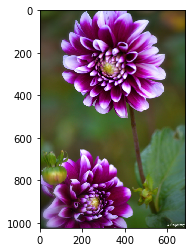

In [65]:
plt.imshow(image_default)

In [66]:
inp = Variable(image).unsqueeze(0)
if use_cuda:
    inp = inp.cuda()

In [67]:
predicted_values = extract_prediction(inp, net)
pooled_features = extract_pooled_features(inp, net)
downsampled_pooled_features = downsample_pooled_features(pooled_features)

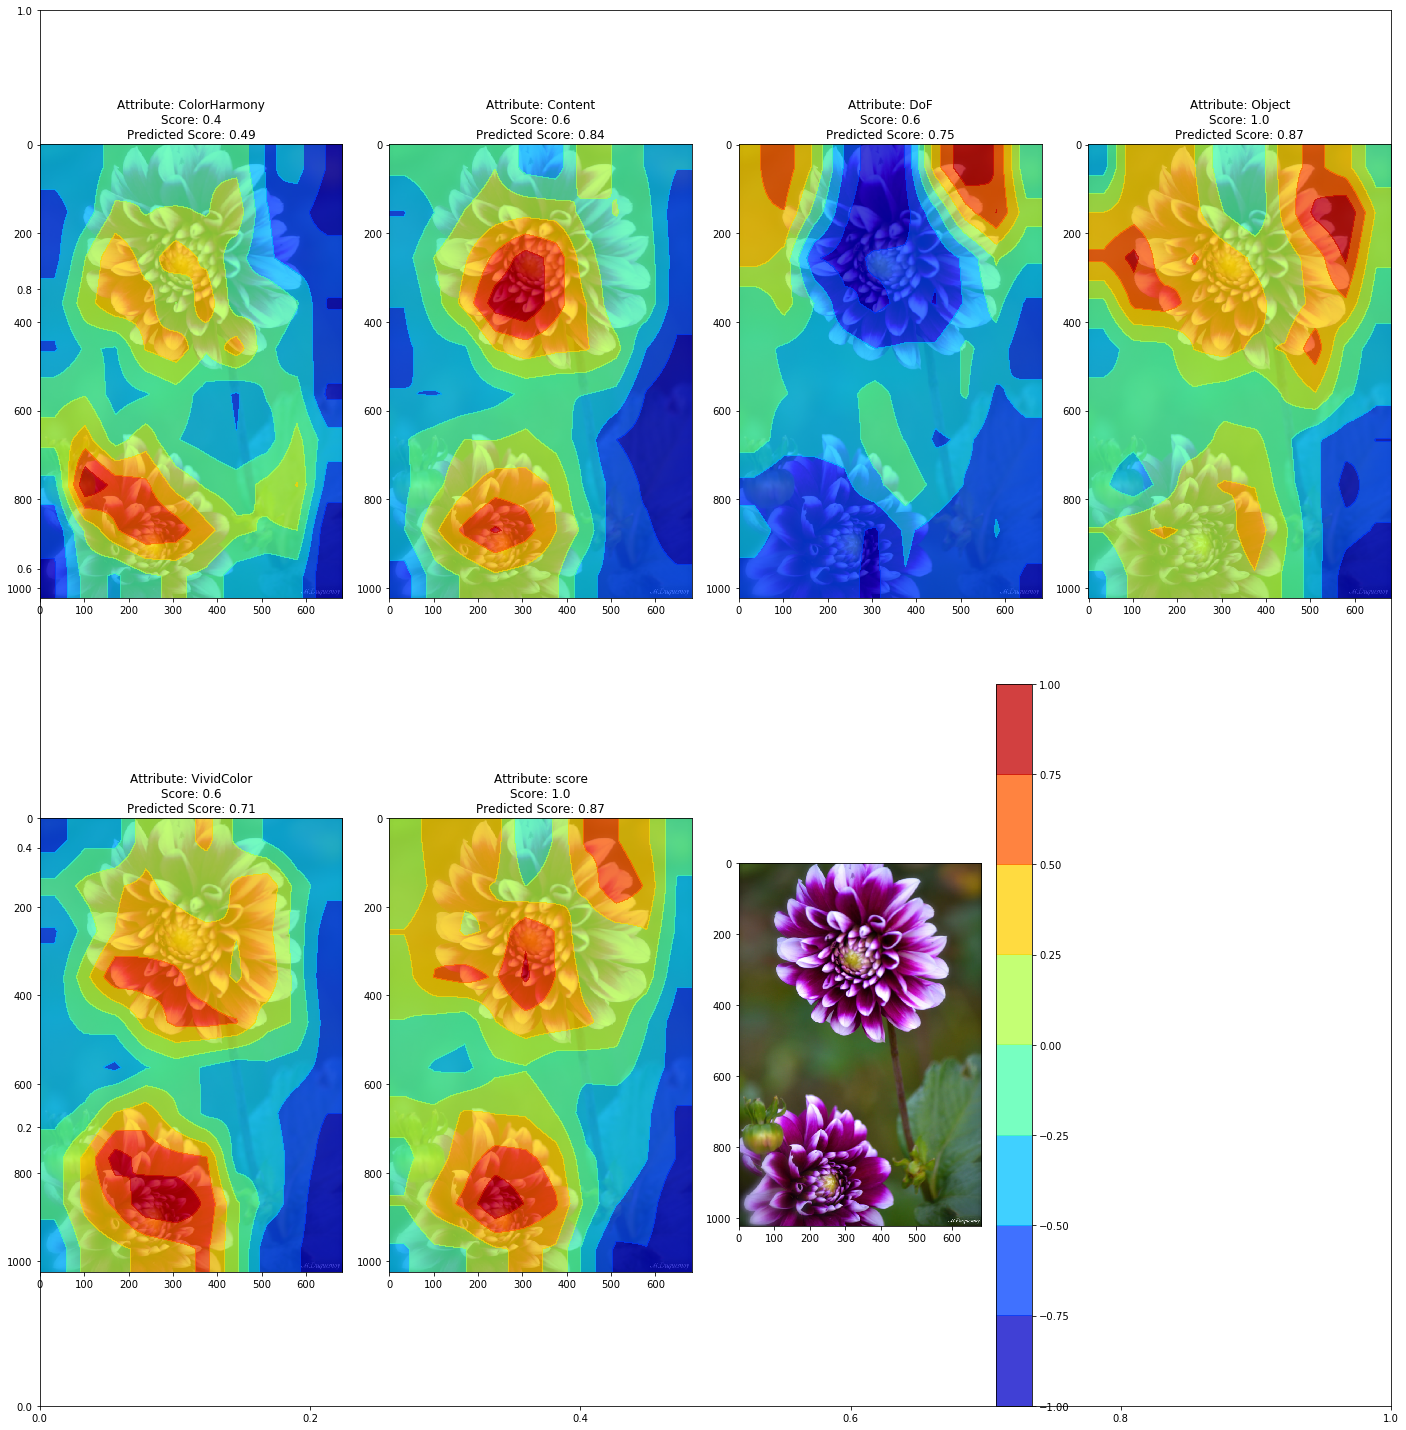

In [70]:
fig, ax = plt.subplots(figsize=(20, 20))
y, x = np.mgrid[0:h, 0:w]
fig.subplots_adjust(right=1,top=1,hspace=0.5,wspace=0.5)
for i, k in enumerate(used_keys): 
    heatmap = extract_heatmap(downsampled_pooled_features, weights[k], w=w, h=h)
    ax = fig.add_subplot(2, 4, i+1)
    ax.imshow(image_default, cmap='gray')
    cb = ax.contourf(x, y, heatmap, cmap='jet', alpha=0.75)
    ax.set_title(f"Attribute: {k}\nScore: {data[k][0]}\nPredicted Score: {round(predicted_values[k], 2)}")
ax = fig.add_subplot(2, 4, 7)
ax.imshow(image_default) 
plt.colorbar(cb)
plt.tight_layout()

#### Correlation for Training Set

In [76]:
from tqdm import tqdm
df_train_data = []
for train_data in tqdm(train_dataset):
    image = train_data['image']
    image_path = train_data['image_path']

    inp = Variable(image).unsqueeze(0)
    if use_cuda:
        inp = inp.cuda()
    output = net(inp).squeeze().data
    row_data = extract_prediction(inp, net) 
    row_data['img_path'] = image_path
    df_train_data.append(row_data)

100%|██████████| 8447/8447 [03:47<00:00, 37.10it/s]


In [79]:
predicted_train_df = pd.DataFrame(df_train_data).sort_values(['img_path'])[used_keys+['img_path']].reset_index(drop=True)
sorted_train_df = train.sort_values(['img_path'])[used_keys+['img_path']].reset_index(drop=True)

In [80]:
predicted_train_df.corrwith(sorted_train_df)

ColorHarmony    0.560178
Content         0.632449
DoF             0.656683
Object          0.704811
VividColor      0.703833
score           0.692177
dtype: float64

#### Correlation for Validation Set

In [83]:
from tqdm import tqdm
df_val_data = []
for val_data in tqdm(val_dataset):
    image = val_data['image']
    image_path = val_data['image_path']

    inp = Variable(image).unsqueeze(0)
    if use_cuda:
        inp = inp.cuda()
    output = net(inp).squeeze().data
    row_data = extract_prediction(inp, net) 
    row_data['img_path'] = image_path
    df_val_data.append(row_data)
predicted_val_df = pd.DataFrame(df_val_data).sort_values(['img_path'])[used_keys+['img_path']].reset_index(drop=True)
sorted_val_df = val.sort_values(['img_path'])[used_keys+['img_path']].reset_index(drop=True)

100%|██████████| 373/373 [00:10<00:00, 37.17it/s]


In [85]:
predicted_val_df.corrwith(sorted_val_df)

ColorHarmony    0.391883
Content         0.347069
DoF             0.553515
Object          0.589780
VividColor      0.689863
score           0.432045
dtype: float64

#### Correlation for Test Set

In [71]:
from tqdm import tqdm
df_test_data = []
for test_data in tqdm(test_dataset):
    image = test_data['image']
    image_path = test_data['image_path']

    inp = Variable(image).unsqueeze(0)
    if use_cuda:
        inp = inp.cuda()
    output = net(inp).squeeze().data
    row_data = extract_prediction(inp, net) 
    row_data['img_path'] = image_path
    df_test_data.append(row_data)
    

100%|██████████| 999/999 [26:08<00:00,  1.52s/it] 


In [72]:
predicted_test_df = pd.DataFrame(df_test_data).sort_values(['img_path'])[used_keys+['img_path']].reset_index(drop=True)
sorted_test_df = test.sort_values(['img_path'])[used_keys+['img_path']].reset_index(drop=True)

In [73]:
predicted_test_df.corrwith(sorted_test_df)

ColorHarmony    0.503174
Content         0.597445
DoF             0.688919
Object          0.654278
VividColor      0.706658
score           0.716499
dtype: float64